In [626]:
import pandas as pd
from sklearn.cluster import KMeans
import collections
import matplotlib.pyplot as plt
from matplotlib import colors
import pylab as pl
%matplotlib inline

import scipy.stats as stats

import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

#special matplotlib argument for improved plots
from matplotlib import rcParams

In [627]:
data = pd.read_csv(r'C:\Users\PB\Downloads\CarsNew.csv')
data = data.loc[data['Year'].isin([2012, 2013])]

In [628]:
kmeans_data = data.fillna(0)
kmeans_data.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200


In [629]:
kmeans_data.shape

(753, 16)

In [630]:
kmeans_data.keys()

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [631]:
columns = ['Model', 'Engine Fuel Type','Transmission Type', 'Driven_Wheels','Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style']

#remove white spaces in columns names:
kmeans_data.columns = kmeans_data.columns.str.strip()

#drop unwated columns:
kmeans_data.drop(columns, inplace=True, axis=1)
kmeans_data.head()


,Make,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
5,BMW,2012,230.0,6.0,28,18,3916,31200
6,BMW,2012,300.0,6.0,26,17,3916,44100
7,BMW,2012,300.0,6.0,28,20,3916,39300
8,BMW,2012,230.0,6.0,28,18,3916,36900
9,BMW,2013,230.0,6.0,27,18,3916,37200


In [632]:
kmeans_data.Make = pd.Categorical(kmeans_data.Make)
kmeans_data['Make_code'] = kmeans_data.Make.cat.codes
kmeans_data.head(5)

,Make,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP,Make_code
5,BMW,2012,230.0,6.0,28,18,3916,31200,3
6,BMW,2012,300.0,6.0,26,17,3916,44100,3
7,BMW,2012,300.0,6.0,28,20,3916,39300,3
8,BMW,2012,230.0,6.0,28,18,3916,36900,3
9,BMW,2013,230.0,6.0,27,18,3916,37200,3


In [633]:
kmeans_data.keys()
#kmeans_data.brand.cat.categories

Index(['Make', 'Year', 'Engine HP', 'Engine Cylinders', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP', 'Make_code'],
      dtype='object')

In [634]:
col1 = ['Year', 'Engine HP', 'Engine Cylinders', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP']
selected = kmeans_data[col1]
selected.head(8)

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
5,2012,230.0,6.0,28,18,3916,31200
6,2012,300.0,6.0,26,17,3916,44100
7,2012,300.0,6.0,28,20,3916,39300
8,2012,230.0,6.0,28,18,3916,36900
9,2013,230.0,6.0,27,18,3916,37200
10,2013,300.0,6.0,28,20,3916,39600
11,2013,230.0,6.0,28,19,3916,31500
12,2013,300.0,6.0,28,19,3916,44400


0
1
2
3
4
5
6
7
8


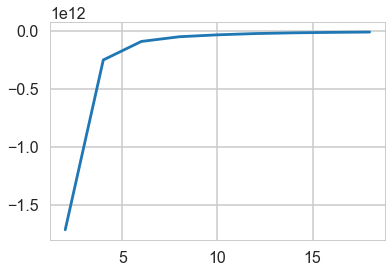

In [635]:
def optimal_clusters(df):
    Nc = range(2, 20, 2)
    data_km = df.values
    kmeans = [KMeans(n_clusters=i) for i in Nc]
    score = []
    for i in range(len(kmeans)):
        print(i)
        score.append(kmeans[i].fit(data_km).score(data_km))
    return Nc, score
#Nc, score = optimal_clusters(df_kmeans)
Nc, score = optimal_clusters(selected)
pl.plot(Nc,score)

In [636]:
    kmeans_model = KMeans(n_clusters=6)
    kmeans_model.fit(selected)
    kmeans_model = kmeans_model.fit(selected)
    print(kmeans_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [637]:
data_label = kmeans_model.predict(selected)
collections.Counter(data_label)

Counter({0: 520, 4: 165, 5: 20, 1: 42, 3: 5, 2: 1})

In [661]:
selected.head(1)

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
5,2012,230.0,6.0,28,18,3916,31200


In [681]:
#Scaling of values
from sklearn import preprocessing
import pandas as pd

x = selected.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head(2)


,0,1,2,3,4,5,6
0,0.0,0.314637,0.5,0.144444,0.065574,0.688551,0.012783
1,0.0,0.410397,0.5,0.122222,0.057377,0.688551,0.022206


In [676]:
selected.head(1)

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
5,2012,230.0,6.0,28,18,3916,31200


In [682]:
df.columns = selected.columns
print(df.head())

   Year  Engine HP  Engine Cylinders  highway MPG  city mpg  Popularity  \
0   0.0   0.314637               0.5     0.144444  0.065574    0.688551   
1   0.0   0.410397               0.5     0.122222  0.057377    0.688551   
2   0.0   0.410397               0.5     0.144444  0.081967    0.688551   
3   0.0   0.314637               0.5     0.144444  0.065574    0.688551   
4   1.0   0.314637               0.5     0.133333  0.065574    0.688551   

       MSRP  
0  0.012783  
1  0.022206  
2  0.018700  
3  0.016947  
4  0.017166  


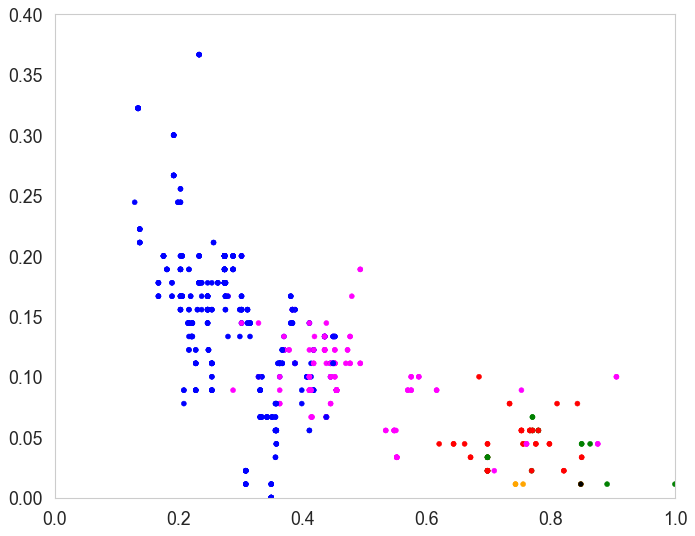

In [683]:
#HP Vs HighwayMPG

from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
color_map=['blue', 'red', 'black', 'orange', 'magenta', 'green']
plt.scatter(df.iloc[:, 1], df.iloc[:, 3], c=data_label, s=20, cmap=colors.ListedColormap(color_map))
#plt.scatter(kmeans_model.cluster_centers_[:,1],kmeans_model.cluster_centers_[:,3],s=100,marker='*',c='red',label='centroids')
plt.ylim(0,0.4)
plt.xlim(0,1)
plt.grid()
plt.show()

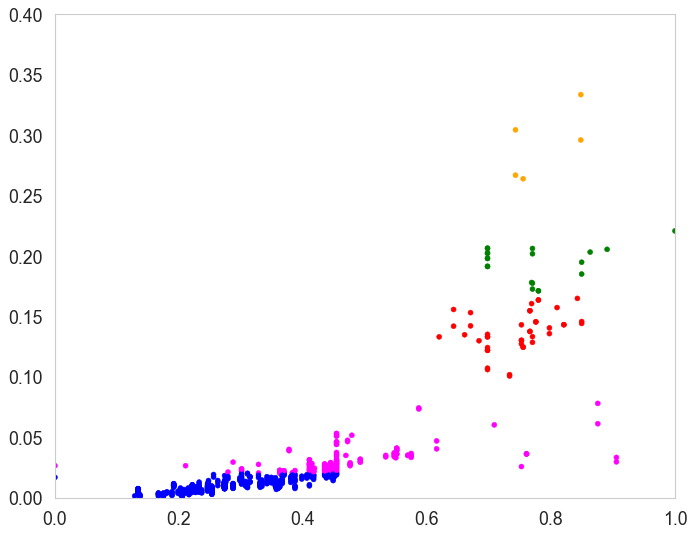

In [684]:
#HP VS CityMPG


from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
color_map=['blue', 'red', 'black', 'orange', 'magenta', 'green']
plt.scatter(df.iloc[:, 1], df.iloc[:, 6], c=data_label, s=20, cmap=colors.ListedColormap(color_map))
#plt.scatter(kmeans_model.cluster_centers_[:,1],kmeans_model.cluster_centers_[:,6],s=250,marker='*',c='red',label='centroids')
plt.ylim(0,0.4)
plt.xlim(0,1)
plt.grid()
plt.show()

In [685]:
print(df.describe())

             Year   Engine HP  Engine Cylinders  highway MPG    city mpg  \
count  753.000000  753.000000        753.000000   753.000000  753.000000   
mean     0.486056    0.363351          0.476428     0.134396    0.082457   
std      0.500138    0.168136          0.185214     0.079798    0.061760   
min      0.000000    0.000000          0.000000     0.000000    0.000000   
25%      0.000000    0.253078          0.333333     0.088889    0.057377   
50%      0.000000    0.310534          0.416667     0.133333    0.073770   
75%      1.000000    0.437756          0.500000     0.177778    0.098361   
max      1.000000    1.000000          1.000000     1.000000    1.000000   

       Popularity        MSRP  
count  753.000000  753.000000  
mean     0.188931    0.029626  
std      0.205453    0.058345  
min      0.000000    0.000000  
25%      0.074061    0.008324  
50%      0.144186    0.012645  
75%      0.245438    0.023228  
max      1.000000    1.000000  


In [686]:
df.head(1)

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
0,0.0,0.314637,0.5,0.144444,0.065574,0.688551,0.012783


In [687]:
#Split training and testing data:
#Y = Car Price
#X = All other features

import sklearn.cross_validation
sklearn.model_selection.train_test_split

X = df.drop('MSRP', axis = 1)
Y = df['MSRP']


X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(504, 6)
(249, 6)
(504,)
(249,)


In [688]:
#Linear Regression:

from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)
print(Y_pred)



[ 0.02715731  0.06042074 -0.00343097  0.000678    0.1463001   0.03870505
  0.17192133  0.00097154  0.03322528  0.03741203 -0.01824407  0.16525465
  0.0202195   0.0291358  -0.00684273  0.04784218  0.000678   -0.00286644
  0.02412907  0.04886724  0.16525465  0.16354741 -0.00286644  0.07199825
  0.0015187   0.06690491 -0.01315582 -0.00577693  0.03044133  0.01523355
  0.00536393 -0.01339276  0.00380425  0.02412907  0.01335205  0.00830455
 -0.00851637  0.03790572  0.09868964  0.06114056  0.00302667  0.01028842
  0.07267261  0.04150151 -0.00551264  0.00116144  0.04166125  0.00380425
  0.01012676  0.04702167  0.00380425  0.02715731  0.04168873  0.03773185
  0.17192133  0.08931351  0.00082833  0.11877156  0.00476748  0.01167063
  0.01028842 -0.01495975  0.04994936  0.02670368  0.00753691  0.08172127
  0.07199825  0.06042074 -0.01376524 -0.01567831  0.00716218  0.06042074
  0.13594188  0.0105901   0.00328179 -0.02820466  0.05440803  0.04846731
 -0.01800709  0.00082833  0.01028842  0.04378706  0

<Figure size 800x640 with 0 Axes>

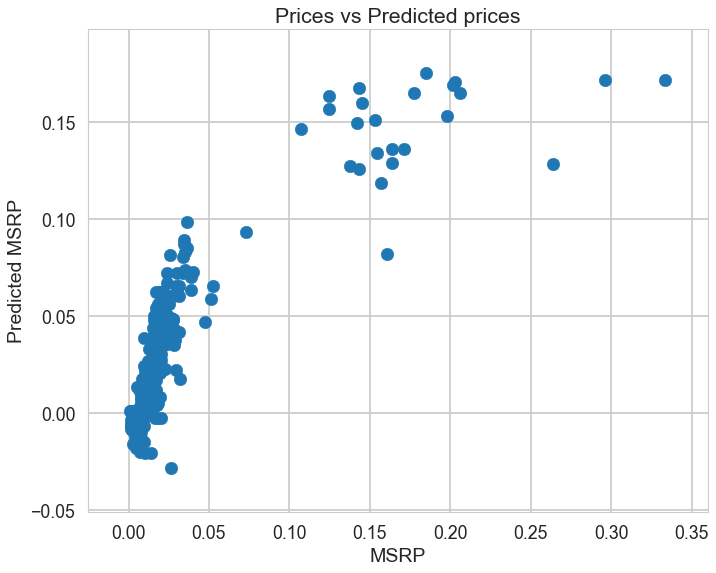

In [689]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(Y_test, Y_pred)
plt.xlabel("MSRP")
plt.ylabel("Predicted MSRP")
plt.title("Prices vs Predicted prices");
# plt.xlim(0,100000)
# plt.ylim(0,100000)


#plt.scatter(Y_test, Y_pred)

C:\Users\PB\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


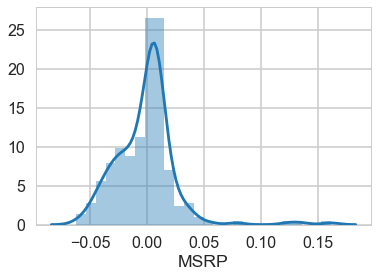

In [690]:
sns.distplot((Y_test-Y_pred))

In [691]:
#Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
#1n∑i=1n|yi−ŷ i|

from sklearn import metrics
print(metrics.mean_absolute_error(Y_test,Y_pred))

0.017778687031001876


In [692]:
# Mean Squared Error (MSE) is the mean of the squared errors:
# 1n∑i=1n(yi−ŷ i)2

print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))

MSE: 0.0006991708629293388


In [693]:
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
# 1n∑i=1n(yi−ŷ i)2

import numpy as np
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

RMSE: 0.02644183925012288


In [694]:
# Comparing these metrics:
# MAE is the easiest to understand, because it's the average error.
# MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
# RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. 
# All of these are loss functions, because we want to minimize them.